## Name : Arul kumar ARK
### Roll No. : 225229103

Lab : 3 - Text corpus creation and binary classification using DNN

######  Dataset Creation: 

In [86]:
import nltk
import pandas as pd

In [87]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer

In [88]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arulk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arulk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arulk\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
df=pd.read_csv("Quotes.csv",encoding='cp1252')

In [90]:
df.shape

(40, 2)

In [91]:
df.head()

,Sentence,Target
0,It always seems impossible until it's done.,0
1,There is nothing impossible to they who will try.,0
2,"Quality is not an act, it is a habit.",0
3,"Good, better, best. Never let it rest. 'Til yo...",0
4,Start where you are. Use what you have. Do wha...,0


In [92]:
df.groupby('Target').count()

,Sentence
Target,
0,20
1,20


##### Pre-processing:

In [93]:
X=df.Sentence
y=df.Target

In [94]:
lemmatizer=WordNetLemmatizer()

In [95]:
def clean_review(review):

    tokens = review.lower().split()
    filtered_tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return " ".join(filtered_tokens)

In [96]:
temp=X.tolist()
fax=[]
for i in temp:
    fax.append(clean_review(i))
n_X=pd.Series(fax)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer()
vectors = tfidf.fit_transform(n_X)
features_names = tfidf.get_feature_names_out()
text_vect = pd.DataFrame(vectors.todense(), columns=features_names)
text_vect

,abandoned,accept,act,again,always,anyone,anything,are,bad,behind,...,try,unique,use,useful,ve,vision,we,winner,worse,you
0,0.00000,0.000000,0.00000,0.000000,0.456890,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.577350,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
2,0.00000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.456033,0.000000,0.000000,...,0.000000,0.000000,0.410042,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
5,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
6,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
7,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
8,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
9,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.577350,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000


In [98]:
import tensorflow as tf
temp = tf.Variable(text_vect)

##### Dataset Preparation:

In [99]:
X_train,X_test,y_train,y_test=train_test_split(text_vect,y,train_size=0.75,test_size=0.25)

In [100]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(30, 156)
(30,)
(10, 156)
(10,)


###### Model Creation & Analysis:

Hidden Layers

In [101]:
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense,Activation

In [102]:
import time

In [103]:
model = Sequential()
model.add(Dense(1028, activation='relu',input_dim=X_train.shape[1]))
model.add(Dense(2, activation='sigmoid')) #output layer
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1028)              161396    
                                                                 
 dense_39 (Dense)            (None, 2)                 2058      
                                                                 
Total params: 163454 (638.49 KB)
Trainable params: 163454 (638.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.7019 - accuracy: 0.2917 - val_loss: 0.6948 - val_accuracy: 0.5000 - 1s/epoch - 613ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6487 - accuracy: 0.8750 - val_loss: 0.6960 - val_accuracy: 0.3333 - 78ms/epoch - 39ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6062 - accuracy: 1.0000 - val_loss: 0.6984 - val_accuracy: 0.3333 - 83ms/epoch - 41ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5658 - accuracy: 1.0000 - val_loss: 0.6998 - val_accuracy: 0.3333 - 78ms/epoch - 39ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5273 - accuracy: 1.0000 - val_loss: 0.7010 - val_accuracy: 0.3333 - 75ms/epoch - 37ms/step
Epoch 6/100
2/2 - 0s - loss: 0.4906 - accuracy: 1.0000 - val_loss: 0.7013 - val_accuracy: 0.3333 - 62ms/epoch - 31ms/step
Epoch 7/100
2/2 - 0s - loss: 0.4536 - accuracy: 1.0000 - val_loss: 0.7041 - val_accuracy: 0.3333 - 56ms/epoch - 28ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4178 - accuracy: 1.0000 - val_loss: 0.7070 - val_accuracy: 0.5000 - 52ms/epoch - 26ms/step
Epoch 9/100
2/2 - 0s - lo

In [105]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 39ms/step - loss: 0.5571 - accuracy: 0.7000


[0.5571497082710266, 0.699999988079071]

In [106]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")


1/1 [==============================] - 0s 40ms/step - loss: 0.5571 - accuracy: 0.7000
Training Accuracy: 1.0000
Testing Accuracy: 0.7000


In [107]:
number_of_nodes = sum(layer.output_shape[1] for layer in model.layers)
number_of_layers = len(model.layers)

# Output : 1028 nodes

In [108]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.7000, Runtime: 8.89 seconds.


model1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model1.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time


training_accuracy = history.history['accuracy'][-1]
loss, testing_accuracy = model1.evaluate(X_test, y_test)
number_of_layers = len(model.layers)


print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

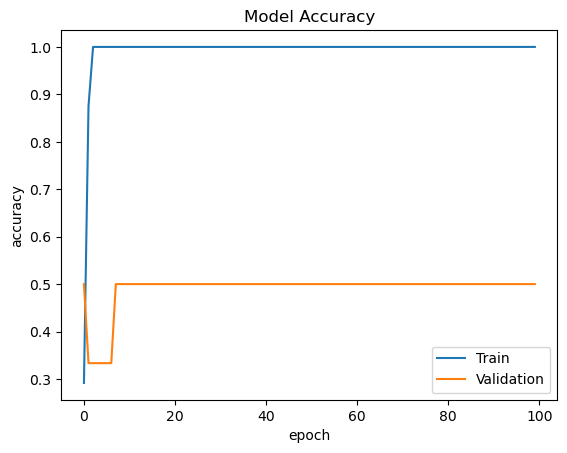

In [109]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

###### Model : 2

In [110]:
model2 = Sequential()
model2.add(Dense(512, activation='relu',input_dim=X_train.shape[1]))
model2.add(Dense(2, activation='sigmoid'))
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               80384     
                                                                 
 dense_41 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 81410 (318.01 KB)
Trainable params: 81410 (318.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [111]:
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6918 - accuracy: 0.4583 - val_loss: 0.6954 - val_accuracy: 0.3333 - 1s/epoch - 505ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6571 - accuracy: 0.8333 - val_loss: 0.7038 - val_accuracy: 0.3333 - 63ms/epoch - 31ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6248 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.3333 - 54ms/epoch - 27ms/step
Epoch 4/100
2/2 - 0s - loss: 0.5961 - accuracy: 1.0000 - val_loss: 0.7092 - val_accuracy: 0.3333 - 59ms/epoch - 29ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5686 - accuracy: 1.0000 - val_loss: 0.7132 - val_accuracy: 0.5000 - 69ms/epoch - 34ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5402 - accuracy: 1.0000 - val_loss: 0.7160 - val_accuracy: 0.5000 - 65ms/epoch - 32ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5137 - accuracy: 1.0000 - val_loss: 0.7184 - val_accuracy: 0.5000 - 61ms/epoch - 30ms/step
Epoch 8/100
2/2 - 0s - loss: 0.4870 - accuracy: 1.0000 - val_loss: 0.7220 - val_accuracy: 0.5000 - 57ms/epoch - 28ms/step
Epoch 9/100
2/2 - 0s - lo

In [112]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 35ms/step - loss: 0.5833 - accuracy: 0.7000


[0.5832611322402954, 0.699999988079071]

In [113]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model2.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")


1/1 [==============================] - 0s 44ms/step - loss: 0.5833 - accuracy: 0.7000
Training Accuracy: 1.0000
Testing Accuracy: 0.7000


# Output : 512 nodes

In [114]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.7000, Runtime: 6.79 seconds.


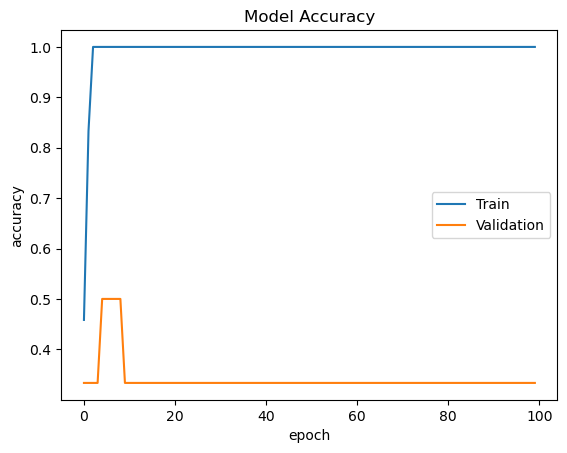

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model : 3

In [116]:
model3 = Sequential()
model3.add(Dense(256, activation='relu',input_dim=X_train.shape[1]))
model3.add(Dense(2, activation='sigmoid')) #output layer
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 256)               40192     
                                                                 
 dense_43 (Dense)            (None, 2)                 514       
                                                                 
Total params: 40706 (159.01 KB)
Trainable params: 40706 (159.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
model3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6815 - accuracy: 0.5833 - val_loss: 0.7007 - val_accuracy: 0.1667 - 1s/epoch - 522ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6566 - accuracy: 0.8750 - val_loss: 0.7051 - val_accuracy: 0.3333 - 88ms/epoch - 44ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6356 - accuracy: 0.9583 - val_loss: 0.7096 - val_accuracy: 0.1667 - 63ms/epoch - 31ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6146 - accuracy: 1.0000 - val_loss: 0.7125 - val_accuracy: 0.1667 - 65ms/epoch - 33ms/step
Epoch 5/100
2/2 - 0s - loss: 0.5946 - accuracy: 1.0000 - val_loss: 0.7151 - val_accuracy: 0.1667 - 64ms/epoch - 32ms/step
Epoch 6/100
2/2 - 0s - loss: 0.5759 - accuracy: 1.0000 - val_loss: 0.7186 - val_accuracy: 0.1667 - 42ms/epoch - 21ms/step
Epoch 7/100
2/2 - 0s - loss: 0.5562 - accuracy: 1.0000 - val_loss: 0.7209 - val_accuracy: 0.1667 - 57ms/epoch - 28ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5374 - accuracy: 1.0000 - val_loss: 0.7243 - val_accuracy: 0.1667 - 44ms/epoch - 22ms/step
Epoch 9/100
2/2 - 0s - lo

In [118]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model3.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 38ms/step - loss: 0.5465 - accuracy: 0.7000
Training Accuracy: 1.0000
Testing Accuracy: 0.7000


In [119]:
model3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 49ms/step - loss: 0.5465 - accuracy: 0.7000


[0.546515941619873, 0.699999988079071]

# Output : 256 nodes

In [120]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.7000, Runtime: 6.66 seconds.


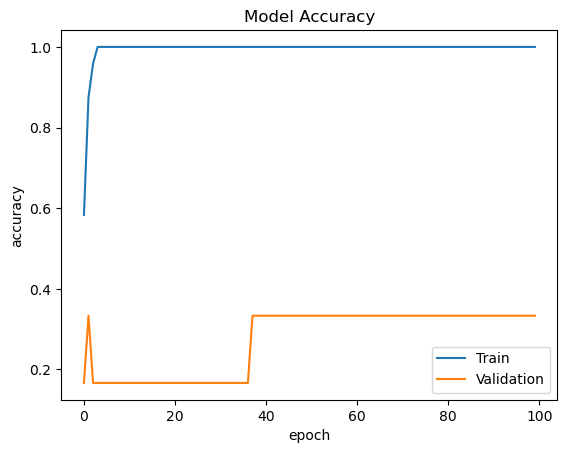

In [121]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model :4

In [122]:
model4 = Sequential()
model4.add(Dense(128, activation='relu',input_dim=X_train.shape[1]))
model4.add(Dense(2, activation='sigmoid')) #output layer
model4.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               20096     
                                                                 
 dense_45 (Dense)            (None, 2)                 258       
                                                                 
Total params: 20354 (79.51 KB)
Trainable params: 20354 (79.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [123]:
model4.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model4.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6889 - accuracy: 0.6250 - val_loss: 0.7109 - val_accuracy: 0.3333 - 1s/epoch - 620ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6738 - accuracy: 0.6667 - val_loss: 0.7130 - val_accuracy: 0.3333 - 71ms/epoch - 35ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6601 - accuracy: 0.7500 - val_loss: 0.7154 - val_accuracy: 0.3333 - 82ms/epoch - 41ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6472 - accuracy: 0.8750 - val_loss: 0.7184 - val_accuracy: 0.3333 - 75ms/epoch - 38ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6345 - accuracy: 0.8750 - val_loss: 0.7201 - val_accuracy: 0.3333 - 73ms/epoch - 37ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6225 - accuracy: 0.9167 - val_loss: 0.7228 - val_accuracy: 0.3333 - 75ms/epoch - 38ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6101 - accuracy: 0.9167 - val_loss: 0.7250 - val_accuracy: 0.3333 - 56ms/epoch - 28ms/step
Epoch 8/100
2/2 - 0s - loss: 0.5982 - accuracy: 0.9583 - val_loss: 0.7274 - val_accuracy: 0.3333 - 67ms/epoch - 34ms/step
Epoch 9/100
2/2 - 0s - lo

In [124]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model4.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 56ms/step - loss: 0.4792 - accuracy: 0.7000
Training Accuracy: 1.0000
Testing Accuracy: 0.7000


In [125]:
model4.evaluate(X_test,y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.4792 - accuracy: 0.7000


[0.47919854521751404, 0.699999988079071]

# Output : 128 nodes

In [126]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.7000, Runtime: 8.64 seconds.


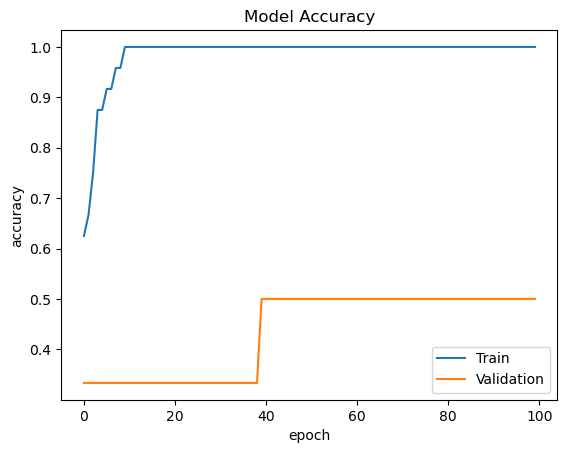

In [127]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model : 5

In [128]:
model5 = Sequential()
model5.add(Dense(64, activation='relu',input_dim=X_train.shape[1]))
model5.add(Dense(2, activation='sigmoid')) #output layer
model5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                10048     
                                                                 
 dense_47 (Dense)            (None, 2)                 130       
                                                                 
Total params: 10178 (39.76 KB)
Trainable params: 10178 (39.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [129]:
model5.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model5.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6871 - accuracy: 0.5417 - val_loss: 0.6899 - val_accuracy: 0.6667 - 997ms/epoch - 498ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6757 - accuracy: 0.7083 - val_loss: 0.6916 - val_accuracy: 0.6667 - 83ms/epoch - 42ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6657 - accuracy: 0.7500 - val_loss: 0.6937 - val_accuracy: 0.6667 - 80ms/epoch - 40ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6561 - accuracy: 0.7500 - val_loss: 0.6955 - val_accuracy: 0.6667 - 74ms/epoch - 37ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6468 - accuracy: 0.7500 - val_loss: 0.6978 - val_accuracy: 0.5000 - 79ms/epoch - 40ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6376 - accuracy: 0.7917 - val_loss: 0.7001 - val_accuracy: 0.5000 - 68ms/epoch - 34ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6281 - accuracy: 0.7917 - val_loss: 0.7021 - val_accuracy: 0.5000 - 47ms/epoch - 24ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6188 - accuracy: 0.9583 - val_loss: 0.7042 - val_accuracy: 0.5000 - 54ms/epoch - 27ms/step
Epoch 9/100
2/2 - 0s -

In [130]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model5.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 49ms/step - loss: 0.4809 - accuracy: 0.7000
Training Accuracy: 1.0000
Testing Accuracy: 0.7000


In [131]:
model5.evaluate(X_test,y_test)

1/1 [==============================] - 0s 51ms/step - loss: 0.4809 - accuracy: 0.7000


[0.48094192147254944, 0.699999988079071]

# Output : 64 nodes

In [132]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.7000, Runtime: 7.34 seconds.


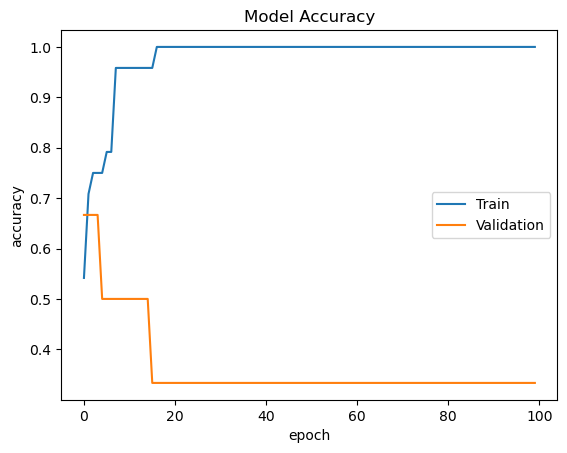

In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

##### Model : 6

In [134]:
model6 = Sequential()
model6.add(Dense(32, activation='relu',input_dim=X_train.shape[1]))
model6.add(Dense(2, activation='sigmoid')) #output layer
model6.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 32)                5024      
                                                                 
 dense_49 (Dense)            (None, 2)                 66        
                                                                 
Total params: 5090 (19.88 KB)
Trainable params: 5090 (19.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [135]:
model6.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model6.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6858 - accuracy: 0.5833 - val_loss: 0.6875 - val_accuracy: 0.6667 - 1s/epoch - 583ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6793 - accuracy: 0.7083 - val_loss: 0.6897 - val_accuracy: 0.5000 - 56ms/epoch - 28ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6734 - accuracy: 0.7917 - val_loss: 0.6916 - val_accuracy: 0.5000 - 64ms/epoch - 32ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6679 - accuracy: 0.7917 - val_loss: 0.6938 - val_accuracy: 0.5000 - 65ms/epoch - 32ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6622 - accuracy: 0.7917 - val_loss: 0.6959 - val_accuracy: 0.5000 - 63ms/epoch - 31ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6568 - accuracy: 0.8333 - val_loss: 0.6977 - val_accuracy: 0.5000 - 64ms/epoch - 32ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6511 - accuracy: 0.8750 - val_loss: 0.6997 - val_accuracy: 0.5000 - 59ms/epoch - 30ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6458 - accuracy: 0.9167 - val_loss: 0.7015 - val_accuracy: 0.5000 - 41ms/epoch - 20ms/step
Epoch 9/100
2/2 - 0s - lo

In [136]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model6.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 32ms/step - loss: 0.5860 - accuracy: 0.6000
Training Accuracy: 1.0000
Testing Accuracy: 0.6000


In [137]:
model6.evaluate(X_test,y_test)

1/1 [==============================] - 0s 58ms/step - loss: 0.5860 - accuracy: 0.6000


[0.586043119430542, 0.6000000238418579]

# Output : 32 nodes

In [138]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.6000, Runtime: 7.55 seconds.


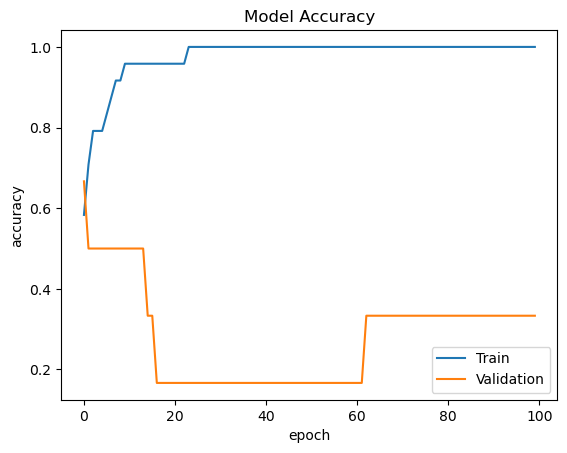

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

##### Model : 7

In [140]:
model7 = Sequential()
model7.add(Dense(16, activation='relu',input_dim=X_train.shape[1]))
model7.add(Dense(2, activation='sigmoid')) #output layer
model7.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 16)                2512      
                                                                 
 dense_51 (Dense)            (None, 2)                 34        
                                                                 
Total params: 2546 (9.95 KB)
Trainable params: 2546 (9.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
model7.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model7.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6846 - accuracy: 0.5417 - val_loss: 0.6921 - val_accuracy: 0.3333 - 1s/epoch - 621ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6792 - accuracy: 0.5833 - val_loss: 0.6933 - val_accuracy: 0.3333 - 83ms/epoch - 41ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6741 - accuracy: 0.5833 - val_loss: 0.6943 - val_accuracy: 0.3333 - 79ms/epoch - 40ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6695 - accuracy: 0.6250 - val_loss: 0.6956 - val_accuracy: 0.3333 - 72ms/epoch - 36ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6646 - accuracy: 0.6667 - val_loss: 0.6967 - val_accuracy: 0.3333 - 62ms/epoch - 31ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6600 - accuracy: 0.6667 - val_loss: 0.6978 - val_accuracy: 0.3333 - 50ms/epoch - 25ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6554 - accuracy: 0.6667 - val_loss: 0.6991 - val_accuracy: 0.3333 - 60ms/epoch - 30ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6506 - accuracy: 0.7083 - val_loss: 0.7001 - val_accuracy: 0.3333 - 61ms/epoch - 30ms/step
Epoch 9/100
2/2 - 0s - lo

In [142]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model7.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 45ms/step - loss: 0.5149 - accuracy: 0.7000
Training Accuracy: 1.0000
Testing Accuracy: 0.7000


In [143]:
model7.evaluate(X_test,y_test)

1/1 [==============================] - 0s 48ms/step - loss: 0.5149 - accuracy: 0.7000


[0.5148552656173706, 0.699999988079071]

# Output : 16 nodes

In [144]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.7000, Runtime: 7.75 seconds.


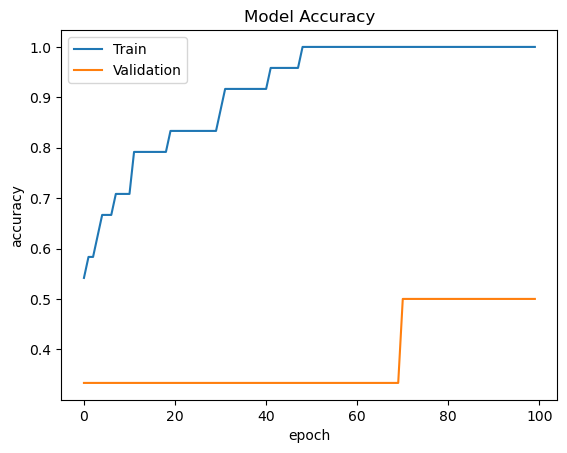

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

#### Model : 8

In [146]:
model8 = Sequential()
model8.add(Dense(8, activation='relu',input_dim=X_train.shape[1]))
model8.add(Dense(2, activation='sigmoid')) #output layer
model8.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 8)                 1256      
                                                                 
 dense_53 (Dense)            (None, 2)                 18        
                                                                 
Total params: 1274 (4.98 KB)
Trainable params: 1274 (4.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
model8.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model8.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.7005 - accuracy: 0.4167 - val_loss: 0.7386 - val_accuracy: 0.3333 - 1s/epoch - 598ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6961 - accuracy: 0.4167 - val_loss: 0.7405 - val_accuracy: 0.3333 - 73ms/epoch - 36ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6922 - accuracy: 0.4167 - val_loss: 0.7426 - val_accuracy: 0.3333 - 78ms/epoch - 39ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6882 - accuracy: 0.5417 - val_loss: 0.7450 - val_accuracy: 0.3333 - 73ms/epoch - 37ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6846 - accuracy: 0.5833 - val_loss: 0.7475 - val_accuracy: 0.3333 - 70ms/epoch - 35ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6806 - accuracy: 0.6667 - val_loss: 0.7496 - val_accuracy: 0.3333 - 81ms/epoch - 41ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6769 - accuracy: 0.6667 - val_loss: 0.7517 - val_accuracy: 0.3333 - 79ms/epoch - 40ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6732 - accuracy: 0.6667 - val_loss: 0.7539 - val_accuracy: 0.3333 - 63ms/epoch - 31ms/step
Epoch 9/100
2/2 - 0s - lo

In [148]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model8.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 45ms/step - loss: 0.5973 - accuracy: 0.6000
Training Accuracy: 1.0000
Testing Accuracy: 0.6000


In [149]:
model8.evaluate(X_test,y_test)

1/1 [==============================] - 0s 32ms/step - loss: 0.5973 - accuracy: 0.6000


[0.5972655415534973, 0.6000000238418579]

# Output : 8 nodes

In [151]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.6000, Runtime: 7.94 seconds.


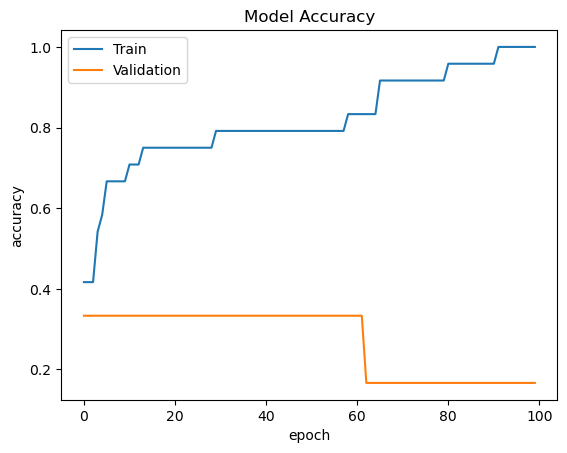

In [152]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Output Layer

###### Model : 1

In [153]:
model_o = Sequential()
model_o.add(Dense(32, activation='relu',input_dim=X_train.shape[1]))
model_o.add(Dense(32, activation='relu'))
model_o.add(Dense(2, activation='sigmoid')) #output layer
model_o.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 32)                5024      
                                                                 
 dense_55 (Dense)            (None, 32)                1056      
                                                                 
 dense_56 (Dense)            (None, 2)                 66        
                                                                 
Total params: 6146 (24.01 KB)
Trainable params: 6146 (24.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
model_o.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model_o.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6777 - accuracy: 0.6250 - val_loss: 0.7076 - val_accuracy: 0.3333 - 1s/epoch - 557ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6699 - accuracy: 0.6250 - val_loss: 0.7114 - val_accuracy: 0.1667 - 63ms/epoch - 31ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6612 - accuracy: 0.7917 - val_loss: 0.7133 - val_accuracy: 0.1667 - 62ms/epoch - 31ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6544 - accuracy: 0.7917 - val_loss: 0.7154 - val_accuracy: 0.1667 - 50ms/epoch - 25ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6473 - accuracy: 0.8333 - val_loss: 0.7168 - val_accuracy: 0.1667 - 61ms/epoch - 31ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6404 - accuracy: 0.8333 - val_loss: 0.7191 - val_accuracy: 0.1667 - 65ms/epoch - 32ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6330 - accuracy: 0.8333 - val_loss: 0.7215 - val_accuracy: 0.1667 - 54ms/epoch - 27ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6256 - accuracy: 0.8333 - val_loss: 0.7240 - val_accuracy: 0.1667 - 56ms/epoch - 28ms/step
Epoch 9/100
2/2 - 0s - lo

In [155]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model_o.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 34ms/step - loss: 0.8088 - accuracy: 0.4000
Training Accuracy: 1.0000
Testing Accuracy: 0.4000


In [156]:
model_o.evaluate(X_test,y_test)

1/1 [==============================] - 0s 34ms/step - loss: 0.8088 - accuracy: 0.4000


[0.8088407516479492, 0.4000000059604645]

# Output : 2 Layers

In [157]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.4000, Runtime: 6.99 seconds.


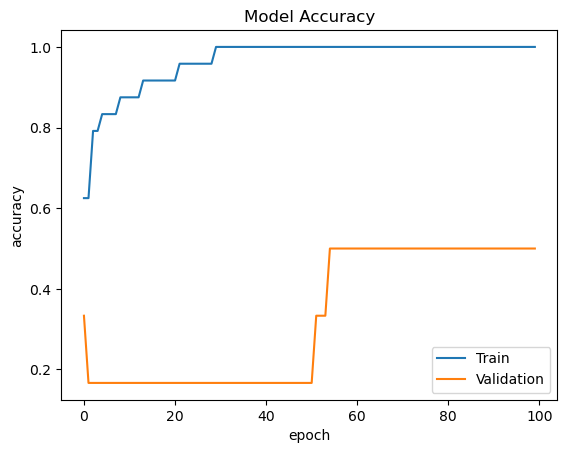

In [158]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

###### Model : 2

In [159]:
model_o1 = Sequential()
model_o1.add(Dense(32, activation='relu',input_dim=X_train.shape[1]))
model_o1.add(Dense(32, activation='relu'))
model_o1.add(Dense(32, activation='relu'))
model_o1.add(Dense(2, activation='sigmoid')) #output layer
model_o1.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 32)                5024      
                                                                 
 dense_58 (Dense)            (None, 32)                1056      
                                                                 
 dense_59 (Dense)            (None, 32)                1056      
                                                                 
 dense_60 (Dense)            (None, 2)                 66        
                                                                 
Total params: 7202 (28.13 KB)
Trainable params: 7202 (28.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [160]:
model_o1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model_o1.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.7037 - accuracy: 0.3750 - val_loss: 0.6942 - val_accuracy: 0.6667 - 1s/epoch - 630ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6950 - accuracy: 0.4167 - val_loss: 0.6987 - val_accuracy: 0.6667 - 53ms/epoch - 26ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6894 - accuracy: 0.4583 - val_loss: 0.7027 - val_accuracy: 0.5000 - 62ms/epoch - 31ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6826 - accuracy: 0.5833 - val_loss: 0.7043 - val_accuracy: 0.5000 - 59ms/epoch - 30ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6776 - accuracy: 0.6667 - val_loss: 0.7063 - val_accuracy: 0.3333 - 55ms/epoch - 27ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6727 - accuracy: 0.7500 - val_loss: 0.7084 - val_accuracy: 0.3333 - 62ms/epoch - 31ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6683 - accuracy: 0.7500 - val_loss: 0.7109 - val_accuracy: 0.3333 - 68ms/epoch - 34ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6627 - accuracy: 0.8333 - val_loss: 0.7122 - val_accuracy: 0.3333 - 69ms/epoch - 35ms/step
Epoch 9/100
2/2 - 0s - lo

In [161]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model_o1.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 32ms/step - loss: 0.2457 - accuracy: 0.9000
Training Accuracy: 1.0000
Testing Accuracy: 0.9000


In [162]:
model_o1.evaluate(X_test,y_test)

1/1 [==============================] - 0s 36ms/step - loss: 0.2457 - accuracy: 0.9000


[0.24568016827106476, 0.8999999761581421]

# Output : 3 Layers

In [163]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.9000, Runtime: 7.34 seconds.


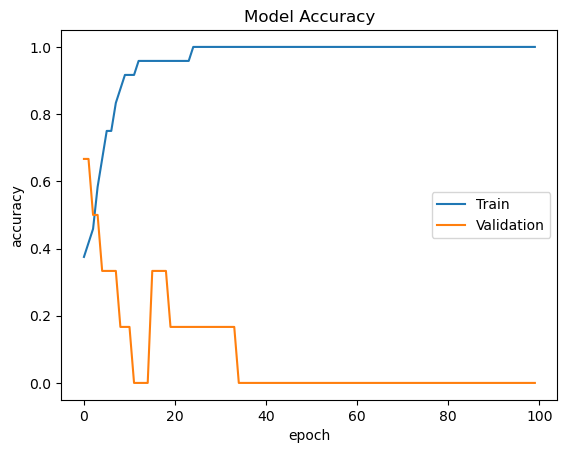

In [164]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

###### Model : 3

In [165]:
model_o2 = Sequential()
model_o2.add(Dense(32, activation='relu',input_dim=X_train.shape[1]))
model_o2.add(Dense(32, activation='relu'))
model_o2.add(Dense(32, activation='relu'))
model_o2.add(Dense(32, activation='relu'))
model_o2.add(Dense(2, activation='sigmoid')) #output layer
model_o2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 32)                5024      
                                                                 
 dense_62 (Dense)            (None, 32)                1056      
                                                                 
 dense_63 (Dense)            (None, 32)                1056      
                                                                 
 dense_64 (Dense)            (None, 32)                1056      
                                                                 
 dense_65 (Dense)            (None, 2)                 66        
                                                                 
Total params: 8258 (32.26 KB)
Trainable params: 8258 (32.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:
model_o2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model_o2.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 1s - loss: 0.6957 - accuracy: 0.4167 - val_loss: 0.6876 - val_accuracy: 0.6667 - 1s/epoch - 727ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6897 - accuracy: 0.6250 - val_loss: 0.6906 - val_accuracy: 0.6667 - 57ms/epoch - 29ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6853 - accuracy: 0.7917 - val_loss: 0.6939 - val_accuracy: 0.5000 - 78ms/epoch - 39ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6808 - accuracy: 0.8750 - val_loss: 0.6948 - val_accuracy: 0.5000 - 72ms/epoch - 36ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6766 - accuracy: 0.9167 - val_loss: 0.6962 - val_accuracy: 0.3333 - 64ms/epoch - 32ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6725 - accuracy: 0.9583 - val_loss: 0.6981 - val_accuracy: 0.3333 - 59ms/epoch - 30ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6680 - accuracy: 0.9583 - val_loss: 0.6992 - val_accuracy: 0.3333 - 62ms/epoch - 31ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6632 - accuracy: 0.9583 - val_loss: 0.6997 - val_accuracy: 0.3333 - 63ms/epoch - 31ms/step
Epoch 9/100
2/2 - 0s - lo

In [167]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model_o2.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 33ms/step - loss: 0.4159 - accuracy: 0.8000
Training Accuracy: 1.0000
Testing Accuracy: 0.8000


In [168]:
model_o2.evaluate(X_test,y_test)

1/1 [==============================] - 0s 30ms/step - loss: 0.4159 - accuracy: 0.8000


[0.415902704000473, 0.800000011920929]

# Output : 4 Layers

In [169]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.8000, Runtime: 7.46 seconds.


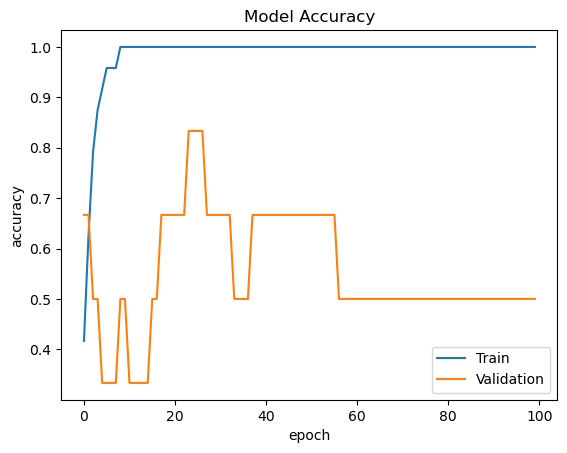

In [170]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

###### Model : 4

In [171]:
model_o3 = Sequential()
model_o3.add(Dense(32, activation='relu',input_dim=X_train.shape[1]))
model_o3.add(Dense(32, activation='relu'))
model_o3.add(Dense(32, activation='relu'))
model_o3.add(Dense(32, activation='relu'))
model_o3.add(Dense(32, activation='relu'))
model_o3.add(Dense(2, activation='sigmoid')) #output layer
model_o3.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 32)                5024      
                                                                 
 dense_67 (Dense)            (None, 32)                1056      
                                                                 
 dense_68 (Dense)            (None, 32)                1056      
                                                                 
 dense_69 (Dense)            (None, 32)                1056      
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dense_71 (Dense)            (None, 2)                 66        
                                                                 
Total params: 9314 (36.38 KB)
Trainable params: 9314 

In [172]:
model_o3.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
start_time = time.time()
history=model_o3.fit(X_train,y_train,epochs=100,verbose=2,validation_split=0.2,batch_size=15)
end_time = time.time()
total_running_time = end_time - start_time

Epoch 1/100
2/2 - 2s - loss: 0.6962 - accuracy: 0.4583 - val_loss: 0.6873 - val_accuracy: 0.8333 - 2s/epoch - 846ms/step
Epoch 2/100
2/2 - 0s - loss: 0.6907 - accuracy: 0.5000 - val_loss: 0.6869 - val_accuracy: 0.8333 - 63ms/epoch - 31ms/step
Epoch 3/100
2/2 - 0s - loss: 0.6860 - accuracy: 0.5000 - val_loss: 0.6887 - val_accuracy: 0.6667 - 69ms/epoch - 34ms/step
Epoch 4/100
2/2 - 0s - loss: 0.6822 - accuracy: 0.6667 - val_loss: 0.6903 - val_accuracy: 0.6667 - 69ms/epoch - 35ms/step
Epoch 5/100
2/2 - 0s - loss: 0.6778 - accuracy: 0.7500 - val_loss: 0.6906 - val_accuracy: 0.6667 - 61ms/epoch - 31ms/step
Epoch 6/100
2/2 - 0s - loss: 0.6733 - accuracy: 0.9167 - val_loss: 0.6902 - val_accuracy: 0.6667 - 60ms/epoch - 30ms/step
Epoch 7/100
2/2 - 0s - loss: 0.6687 - accuracy: 0.9583 - val_loss: 0.6903 - val_accuracy: 0.5000 - 75ms/epoch - 38ms/step
Epoch 8/100
2/2 - 0s - loss: 0.6629 - accuracy: 1.0000 - val_loss: 0.6896 - val_accuracy: 0.5000 - 72ms/epoch - 36ms/step
Epoch 9/100
2/2 - 0s - lo

In [173]:
# Training Accuracy
training_accuracy = history.history['accuracy'][-1]

# Testing Accuracy
loss, testing_accuracy = model_o3.evaluate(X_test, y_test)

print(f"Training Accuracy: {training_accuracy:.4f}")
print(f"Testing Accuracy: {testing_accuracy:.4f}")

1/1 [==============================] - 0s 44ms/step - loss: 0.8794 - accuracy: 0.8000
Training Accuracy: 1.0000
Testing Accuracy: 0.8000


In [174]:
model_o3.evaluate(X_test,y_test)

1/1 [==============================] - 0s 47ms/step - loss: 0.8794 - accuracy: 0.8000


[0.879449188709259, 0.800000011920929]

# Output : 5 Layers

In [175]:
print(f"Number of Nodes: {number_of_nodes}, Number of Layers: {number_of_layers}, Training Accuracy: {history.history['accuracy'][-1]:.4f}, Testing Accuracy: {testing_accuracy:.4f}, Runtime: {total_running_time:.2f} seconds.")

Number of Nodes: 1030, Number of Layers: 2, Training Accuracy: 1.0000, Testing Accuracy: 0.8000, Runtime: 8.28 seconds.


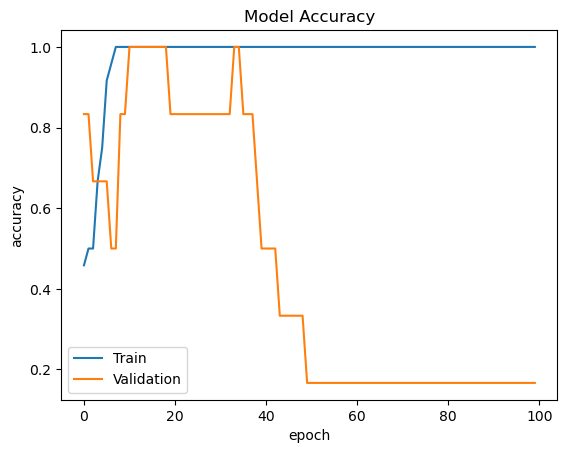

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()